# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [252]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [253]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [254]:
# Selecionando as linhas que tem tip_pct maior que 0.5
tips_high_tip_pct = tips[tips['tip_pct'] > 0.5]
tips_high_tip_pct

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381,2.1
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286,5.6


In [255]:
# Excluindo as linhas que selecionei com valor de tip_pct maior que 0.5
tips = tips.drop(tips_high_tip_pct.index)


In [256]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.31e-12
Time:                        00:51:29   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.11e-14
Time:                        00:51:33   Log-Likelihood:                 336.23
No. Observations:                 242   AIC:                            -668.5
Df Residuals:                     240   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3836      0.024     16.

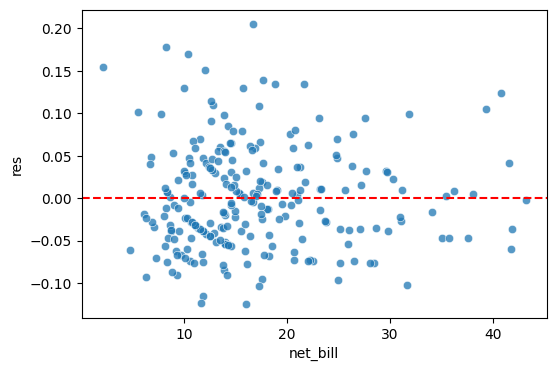

In [257]:
y = tips['tip_pct']
x = tips['net_bill']

reg = smf.ols('y ~ np.log(x+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.09e-12
Time:                        00:51:39   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2932      0.020     14.

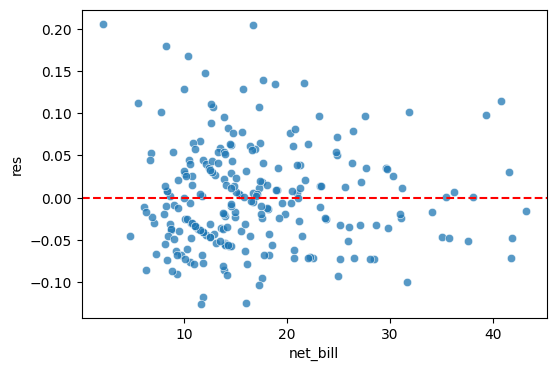

In [258]:
reg = smf.ols('y ~ x + np.power(x,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:         np.log(x + .1)   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.11e-14
Time:                        00:51:43   Log-Likelihood:                -122.23
No. Observations:                 242   AIC:                             248.5
Df Residuals:                     240   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3266      0.077     43.341      0.0

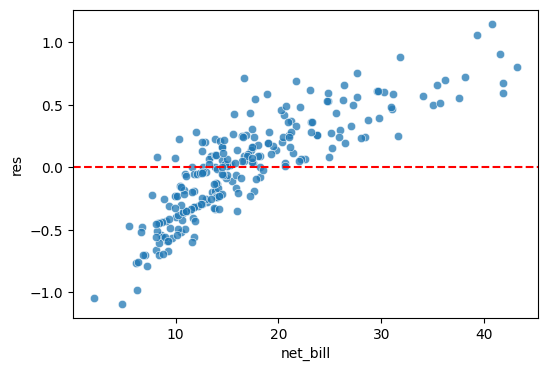

In [259]:
reg = smf.ols('np.log(x+.1) ~ y', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [260]:
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'net_bill']].corr().iloc[0,1]

In [261]:
r**2

0.1894639462920304

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:         np.log(y + .1)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     70.94
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.39e-15
Time:                        00:51:52   Log-Likelihood:                 38.806
No. Observations:                 242   AIC:                            -73.61
Df Residuals:                     240   BIC:                            -66.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5889      0.081     -7.

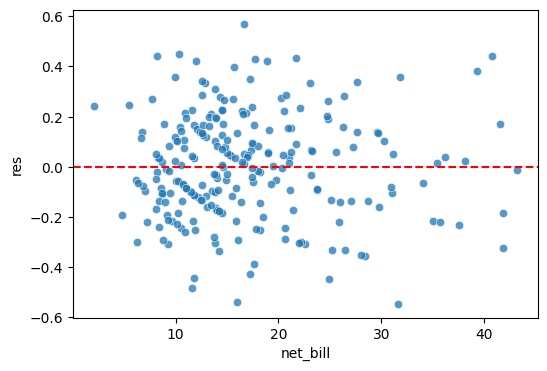

In [262]:
reg = smf.ols('np.log(y+.1) ~ np.log(x+.1)', data= tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x=x, y=tips['res'], data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')


In [263]:
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'net_bill']].corr().iloc[0,1]
r**2

0.9083470038478527

###  6. qual modelo resultou no melhor ajuste?

O último modelo com log do tip_pct em função do log de net_bill